In [10]:
import pyodbc
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv('copy.csv')

In [5]:
col=['a','b','c','d','e']
data2_ind_v=data[col]

In [7]:
corr=data2_ind_v.corr()

In [8]:
corr

,a,b,c,d,e
a,1.000000,0.786993,0.500901,0.657109,0.520708
b,0.786993,1.000000,0.581630,0.770731,0.611482
c,0.500901,0.581630,1.000000,0.607538,0.466205
d,0.657109,0.770731,0.607538,1.000000,0.654206
e,0.520708,0.611482,0.466205,0.654206,1.000000


In [179]:
feature=data2.iloc[:,:-1].values
labels=data2.iloc[:,-1].values

In [180]:
#set random
np.random.seed(0)  

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,labels,test_size=0.20, random_state=0)

In [181]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [182]:
# XGBoost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [183]:
model_XG=XGBClassifier(n_estimators=400, learning_rate=0.05)
eval_set = [(X_train, y_train), (X_test, y_test)]
model_XG.fit(X_train, y_train, early_stopping_rounds=10,eval_metric=['error','logloss'],eval_set =eval_set, verbose=True)

[0]	validation_0-error:0.028249	validation_0-logloss:0.646161	validation_1-error:0.028548	validation_1-logloss:0.648684
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.028249	validation_0-logloss:0.606105	validation_1-error:0.028548	validation_1-logloss:0.608505
[2]	validation_0-error:0.028249	validation_0-logloss:0.572415	validation_1-error:0.028548	validation_1-logloss:0.571036
[3]	validation_0-error:0.028249	validation_0-logloss:0.540178	validation_1-error:0.028548	validation_1-logloss:0.537846
[4]	validation_0-error:0.028249	validation_0-logloss:0.506023	validation_1-error:0.028548	validation_1-logloss:0.506893
[5]	validation_0-error:0.028249	validation_0-logloss:0.477812	validation_1-error:0.028548	validation_1-logloss:0.479429
[6]	validation_0-error:0.028249	validation_0-logloss:0.453824	validation_1-error:0.028548	validation_1-logloss:0.45

[67]	validation_0-error:0.009809	validation_0-logloss:0.057243	validation_1-error:0.010314	validation_1-logloss:0.058438
[68]	validation_0-error:0.009804	validation_0-logloss:0.056129	validation_1-error:0.010304	validation_1-logloss:0.057157
[69]	validation_0-error:0.009804	validation_0-logloss:0.055309	validation_1-error:0.010325	validation_1-logloss:0.056274
[70]	validation_0-error:0.009796	validation_0-logloss:0.054318	validation_1-error:0.010325	validation_1-logloss:0.055339
[71]	validation_0-error:0.009804	validation_0-logloss:0.053421	validation_1-error:0.010325	validation_1-logloss:0.054372
[72]	validation_0-error:0.009796	validation_0-logloss:0.052572	validation_1-error:0.010325	validation_1-logloss:0.053532
[73]	validation_0-error:0.009796	validation_0-logloss:0.051493	validation_1-error:0.010325	validation_1-logloss:0.052485
[74]	validation_0-error:0.009776	validation_0-logloss:0.050474	validation_1-error:0.010314	validation_1-logloss:0.051516
[75]	validation_0-error:0.009776

[135]	validation_0-error:0.007396	validation_0-logloss:0.027648	validation_1-error:0.008111	validation_1-logloss:0.028885
[136]	validation_0-error:0.007396	validation_0-logloss:0.027492	validation_1-error:0.008111	validation_1-logloss:0.028792
[137]	validation_0-error:0.007396	validation_0-logloss:0.027477	validation_1-error:0.008111	validation_1-logloss:0.028703
[138]	validation_0-error:0.007396	validation_0-logloss:0.027223	validation_1-error:0.008111	validation_1-logloss:0.028481
[139]	validation_0-error:0.007396	validation_0-logloss:0.027025	validation_1-error:0.008111	validation_1-logloss:0.028258
[140]	validation_0-error:0.007399	validation_0-logloss:0.026783	validation_1-error:0.008111	validation_1-logloss:0.028108
[141]	validation_0-error:0.007399	validation_0-logloss:0.02673	validation_1-error:0.008111	validation_1-logloss:0.028027
[142]	validation_0-error:0.00725	validation_0-logloss:0.026517	validation_1-error:0.00796	validation_1-logloss:0.02783
[143]	validation_0-error:0.0

[203]	validation_0-error:0.006941	validation_0-logloss:0.022557	validation_1-error:0.007628	validation_1-logloss:0.023977
[204]	validation_0-error:0.007087	validation_0-logloss:0.022506	validation_1-error:0.007779	validation_1-logloss:0.023914
[205]	validation_0-error:0.007087	validation_0-logloss:0.022489	validation_1-error:0.007779	validation_1-logloss:0.023896
[206]	validation_0-error:0.007087	validation_0-logloss:0.022467	validation_1-error:0.007779	validation_1-logloss:0.023883
[207]	validation_0-error:0.007087	validation_0-logloss:0.022446	validation_1-error:0.007779	validation_1-logloss:0.023854
[208]	validation_0-error:0.007087	validation_0-logloss:0.022391	validation_1-error:0.007779	validation_1-logloss:0.023797
[209]	validation_0-error:0.007087	validation_0-logloss:0.022347	validation_1-error:0.007779	validation_1-logloss:0.023783
[210]	validation_0-error:0.007087	validation_0-logloss:0.022304	validation_1-error:0.007779	validation_1-logloss:0.023725
[211]	validation_0-error

[271]	validation_0-error:0.006896	validation_0-logloss:0.020755	validation_1-error:0.007587	validation_1-logloss:0.022246
[272]	validation_0-error:0.006896	validation_0-logloss:0.020725	validation_1-error:0.007587	validation_1-logloss:0.022219
[273]	validation_0-error:0.006896	validation_0-logloss:0.020724	validation_1-error:0.007587	validation_1-logloss:0.022215
[274]	validation_0-error:0.006896	validation_0-logloss:0.020721	validation_1-error:0.007587	validation_1-logloss:0.02221
[275]	validation_0-error:0.006896	validation_0-logloss:0.020717	validation_1-error:0.007587	validation_1-logloss:0.022208
[276]	validation_0-error:0.006896	validation_0-logloss:0.020706	validation_1-error:0.007587	validation_1-logloss:0.022199
[277]	validation_0-error:0.006893	validation_0-logloss:0.02069	validation_1-error:0.007577	validation_1-logloss:0.022173
[278]	validation_0-error:0.006893	validation_0-logloss:0.020688	validation_1-error:0.007577	validation_1-logloss:0.022171
[279]	validation_0-error:0

[339]	validation_0-error:0.006488	validation_0-logloss:0.019848	validation_1-error:0.007104	validation_1-logloss:0.021383
[340]	validation_0-error:0.006488	validation_0-logloss:0.019834	validation_1-error:0.007104	validation_1-logloss:0.021374
[341]	validation_0-error:0.006488	validation_0-logloss:0.019815	validation_1-error:0.007104	validation_1-logloss:0.021356
[342]	validation_0-error:0.006488	validation_0-logloss:0.019808	validation_1-error:0.007104	validation_1-logloss:0.021349
[343]	validation_0-error:0.006488	validation_0-logloss:0.019807	validation_1-error:0.007104	validation_1-logloss:0.021346
[344]	validation_0-error:0.006488	validation_0-logloss:0.019805	validation_1-error:0.007104	validation_1-logloss:0.021345
[345]	validation_0-error:0.006488	validation_0-logloss:0.019802	validation_1-error:0.007104	validation_1-logloss:0.021345
[346]	validation_0-error:0.006488	validation_0-logloss:0.019792	validation_1-error:0.007104	validation_1-logloss:0.021333
[347]	validation_0-error

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[0.32145783 0.42336908 0.0933499  0.12173174 0.04009141]


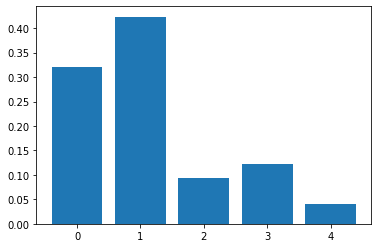

In [184]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# feature importance
print(model_XG.feature_importances_)
# plot
pyplot.bar(range(len(model_XG.feature_importances_)), model_XG.feature_importances_)
pyplot.show()

In [185]:
# make predictions for test data
y_pred=model_XG.predict(X_test)
predictions = [round(value) for value in y_pred]

In [186]:
# evaluate predictions
accuracy= accuracy_score(y_test, predictions)
accuracy

0.9931874213836478

In [187]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[81230,   500],
       [  177, 17468]], dtype=int64)

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     81730
           1       0.97      0.99      0.98     17645

    accuracy                           0.99     99375
   macro avg       0.98      0.99      0.99     99375
weighted avg       0.99      0.99      0.99     99375



In [189]:
predicted_probas = pd.DataFrame(model_XG.predict_proba(X_test))

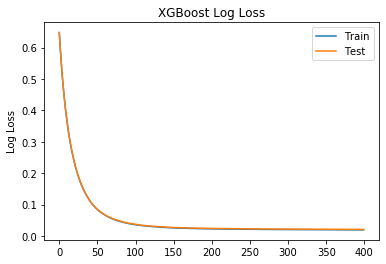

In [190]:
# retrieve performance metrics
results = model_XG.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
from matplotlib import pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

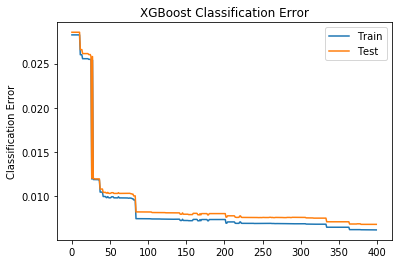

In [191]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [114]:
# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# CV model
accuracy = cross_val_score(model_XG, X=X_train, y=y_train, cv=10)
accuracy.mean()
accuracy.std()
print("Accuracy: %.2f%% (%.2f%%)" % (accuracy.mean()*100, accuracy.std()*100))

Accuracy: 99.38% (0.06%)


In [192]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [193]:
fpr, tpr, thresholds = roc_curve(y_test, model_XG.predict_proba(X_test)[:,1])

In [194]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99993882, 0.99995106,
       1.        ])

In [195]:
tpr

array([0.        , 0.30728252, 0.30813262, ..., 1.        , 1.        ,
       1.        ])

In [196]:
thresholds

array([1.9999959e+00, 9.9999595e-01, 9.9999559e-01, ..., 2.9180425e-08,
       2.8419613e-08, 2.6228207e-08], dtype=float32)

In [197]:
xg_roc_auc1=roc_auc_score(y_test,model_XG.predict(X_test))

In [198]:
xg_roc_auc1

0.9919255625297889

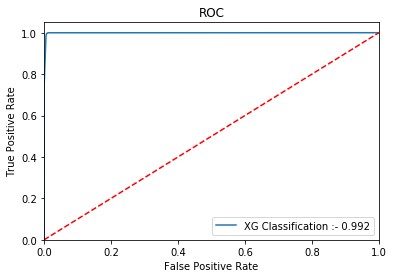

In [199]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='XG Classification :- %0.3f' % xg_roc_auc1)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.savefig('XG_ROC')
plt.show()

Gini Coefficient

In [200]:
Gini=2*xg_roc_auc1-1
Gini

0.9838511250595778

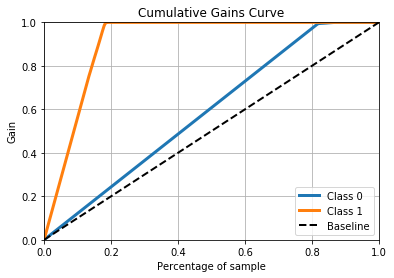

In [201]:
import matplotlib.pyplot as plt

import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)

plt.show()

In [203]:
predicted_probas=predicted_probas.rename({0:'zero',1:'p'},axis='columns')

In [204]:
y_test = pd.DataFrame(y_test)

In [205]:
y_test = y_test.rename({0:'y'},axis='columns')

In [208]:
col=['p']
predicted_probas=predicted_probas[col]

In [210]:
df= pd.concat([predicted_probas,y_test],axis=1)
df

,p,y
0,9.999959e-01,1
1,4.540277e-07,0
2,8.656946e-05,0
3,2.258450e-05,0
4,7.149963e-05,0
...,...,...
99370,4.789154e-04,0
99371,1.149512e-04,0
99372,7.110003e-07,0
99373,3.503407e-04,0


1---->Create deciles based on predicted probability columns which means dividing probability into 10 parts. First decile should contain highest probability score.

2---->Calculate the cumulative % of match and non-match in each decile and then compute the difference between these two cumulative distribution.

In [222]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['matchs']   = grouped.sum()[target]
    kstable['nonmatchs'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['match_rate'] = (kstable.matchs / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonmatch_rate'] = (kstable.nonmatchs / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_matchrate']=(kstable.matchs / data[target].sum()).cumsum()
    kstable['cum_nonmatchrate']=(kstable.nonmatchs / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_matchrate']-kstable['cum_nonmatchrate'], 3) * 100

    #Formating
    kstable['cum_matchrate']= kstable['cum_matchrate'].apply('{0:.2%}'.format)
    kstable['cum_nonmatchrate']= kstable['cum_nonmatchrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)

  #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

1---->KS is where the difference is maximum

In [223]:
mydf = ks(data=df,target="y", prob="p")

            min_prob      max_prob  matchs  nonmatchs match_rate  \
Decile                                                             
1       9.944277e-01  9.999959e-01    9785          0     55.45%   
2       2.849326e-03  9.940069e-01    7858       2204     44.53%   
3       4.208696e-04  2.843747e-03       2       9957      0.01%   
4       1.774721e-04  4.207992e-04       0       9787      0.00%   
5       9.684565e-05  1.765809e-04       0       9878      0.00%   
6       7.091620e-05  9.589123e-05       0       9524      0.00%   
7       2.257518e-05  7.084610e-05       0       9405      0.00%   
8       9.584629e-07  2.237806e-05       0      10751      0.00%   
9       4.729391e-07  9.577146e-07       0       9568      0.00%   
10      2.622821e-08  4.540277e-07       0      10656      0.00%   

       nonmatch_rate cum_matchrate cum_nonmatchrate    KS  
Decile                                                     
1              0.00%        55.45%            0.00%  55.5  
2  

In [224]:
writer=pd.ExcelWriter('mydf.xlsx',engine='xlsxwriter')
mydf.to_excel(writer)
writer.save()

In [215]:
from scipy.stats import ks_2samp

In [216]:
ks_2samp(df.loc[df.y==0,"p"], df.loc[df.y==1,"p"])

Ks_2sampResult(statistic=0.9884773197845389, pvalue=0.0)